In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [126]:
import numpy as np
from matplotlib import pylab as plt
import seaborn as sns
import pandas as pd
import imblearn
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from imblearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from C45 import C45Classifier

In [127]:
Beans = pd.read_excel('DryBeanDataSet.xlsx')
Beans.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.82765,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.80264,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635


In [128]:
Beans["Colour"] = Beans["Colour"].astype('category')
Beans["Constantness"] = Beans["Constantness"].astype('category')
Beans["Class"] = Beans["Class"].astype('category')
Beans["Extent"] = pd.to_numeric(Beans["Extent"], errors='coerce')
Beans["Compactness"] = pd.to_numeric(Beans["Compactness"], errors='coerce')
Beans["ShapeFactor6"] = pd.to_numeric(Beans["ShapeFactor6"], errors='coerce')
Beans.dtypes

Area                  int64
Perimeter           float64
MajorAxisLength     float64
MinorAxisLength     float64
AspectRation        float64
Eccentricity        float64
ConvexArea            int64
Constantness       category
EquivDiameter       float64
Colour             category
Extent              float64
Solidity            float64
roundness           float64
Compactness         float64
ShapeFactor1        float64
ShapeFactor2        float64
ShapeFactor3        float64
ShapeFactor4        float64
ShapeFactor5        float64
ShapeFactor6        float64
Class              category
Sort order          float64
dtype: object

In [129]:
Beans["Class"].replace('?', np.nan, inplace=True)
Beans["Colour"].replace('?', np.nan, inplace=True)

In [130]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class              17
Sort order          0
dtype: int64

In [131]:
Beans = Beans[Beans['Class'].notna()]
Beans

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,Constantness,EquivDiameter,Colour,...,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,ShapeFactor5,ShapeFactor6,Class,Sort order
0,84648,1132.054,439.915710,248.961941,1.767000,0.824453,86779,1,328.294351,brown,...,0.830027,0.746266,0.005197,0.000994,0.556914,3.487008,0.984066,50.809833,CALI,0.134791
1,39704,736.873,271.659919,186.481404,1.456767,0.727175,40106,1,224.839282,black,...,0.918880,0.827650,0.006842,0.001980,0.685004,1.242335,0.997891,148.508874,DERMASON,0.898848
2,35835,687.914,237.704180,192.176759,1.236904,0.588537,36190,1,213.603696,green,...,0.951588,0.898611,0.006633,0.002668,0.807503,2.813489,0.998803,82.107117,SEKER,0.539684
3,223035,1817.278,680.812555,419.994347,1.621004,0.787040,225889,1,532.894907,brown,...,0.848673,0.782734,0.003052,0.000707,0.612672,3.074472,0.993144,147.347735,BOMBAY,0.149130
4,41957,767.143,287.962974,186.166695,1.546802,0.762918,42310,1,231.130508,brown,...,0.895904,0.802640,0.006863,0.001757,0.644230,2.213954,0.996497,22.893826,SIRA,0.447635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,23018,578.382,203.761000,144.297607,1.412089,0.706041,23465,1,171.194123,black,...,0.864665,0.840171,0.008852,0.002721,0.705888,2.197446,0.996776,85.821969,DERMASON,0.764478
13607,69773,1095.057,387.116310,231.153291,1.674717,0.802155,71055,1,298.056610,brown,...,0.731179,0.769941,0.005548,0.001203,0.592809,1.004792,0.992787,152.980591,BARBUNYA,0.679735
13608,55773,968.988,347.920243,204.491191,1.701395,0.809040,57047,0,266.481499,brown,...,0.746444,0.765927,0.006238,0.001324,0.586644,2.219590,0.998113,102.437378,BARBUNYA,0.946849
13609,64235,1005.875,409.304636,201.686606,2.029409,0.870169,65018,1,285.983465,white,...,0.797799,0.698706,0.006372,0.000937,0.488190,2.078504,0.990736,174.754039,HOROZ,0.046135


In [132]:
Beans.isna().sum()

Area                0
Perimeter           0
MajorAxisLength     0
MinorAxisLength     0
AspectRation        0
Eccentricity        0
ConvexArea          0
Constantness        0
EquivDiameter       0
Colour              6
Extent              6
Solidity            0
roundness           0
Compactness        18
ShapeFactor1        0
ShapeFactor2        0
ShapeFactor3        0
ShapeFactor4        0
ShapeFactor5        0
ShapeFactor6        5
Class               0
Sort order          0
dtype: int64

### Drop incorrectly captured outliers 

In [133]:
Beans = Beans.drop([2762, 3941, 4780, 5884])
Beans = Beans.reset_index(drop=True)

In [9]:
from myTree import ClassificationTree

X = Beans.drop(['Sort order', 'Class'], axis = 1)
y = Beans['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mytree = ClassificationTree(max_depth=None, min_samples_split=2, random_state=0, data_split_size=0.2)
mytree.fit(X_train, y_train)

In [10]:
mytree.print_tree(mytree.root)

0 Node: Split on 'Constantness'
  If Constantness == 1:
  1 Node: Split on 'Perimeter'
    If Perimeter == < 852.567:
    2 Node: Split on 'MinorAxisLength'
      If MinorAxisLength == < 181.615792155607:
      3 Node: Split on 'MajorAxisLength'
        If MajorAxisLength == < 270.4931391488275:
        4 Node: Split on 'ConvexArea'
          If ConvexArea == < 35071.0:
          5 Node: Split on 'ShapeFactor1'
            If ShapeFactor1 == < 0.007373753408358075:
            6 Node: Split on 'ShapeFactor2'
              If ShapeFactor2 == < 0.00242562519831099:
              Leaf: Predict DERMASON
              If ShapeFactor2 == >= 0.00242562519831099:
              7 Node: Split on 'Extent'
                If Extent == < 0.755289864641796:
                Leaf: Predict DERMASON
                If Extent == >= 0.755289864641796:
                8 Node: Split on 'Area'
                  If Area == < 33325.0:
                  9 Node: Split on 'ShapeFactor5'
                    If Sha

In [11]:
y_pred = mytree.predict(X_train)
(y_train == y_pred).sum() / len(y_train)

0.9462953231739359

In [12]:
y_pred = mytree.predict(X_test)
y_pred

10372        CALI
5954         SIRA
7095         SIRA
12577    DERMASON
8593     DERMASON
           ...   
11469    BARBUNYA
2847     BARBUNYA
9570     DERMASON
587          SIRA
4970        SEKER
Length: 4079, dtype: object

In [13]:
(y_test == y_pred).sum() / len(y_test)

0.9159107624417749

In [14]:
y_test_str = np.array(y_test, dtype=str)
print(np.unique(y_test_str))
y_pred_str = np.array(y_pred, dtype=str)
print(np.unique(y_pred_str))
print(pd.Series(y_pred_str).value_counts())
print('Classification Report:')
print(classification_report(y_test_str, y_pred_str, target_names=np.unique(y_test_str)))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
DERMASON    1111
SIRA         787
SEKER        632
HOROZ        568
CALI         445
BARBUNYA     392
BOMBAY       144
dtype: int64
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.88      0.87      0.87       396
      BOMBAY       1.00      0.99      1.00       145
        CALI       0.91      0.90      0.90       449
    DERMASON       0.88      0.92      0.90      1070
       HOROZ       0.98      0.98      0.98       569
       SEKER       0.97      0.97      0.97       634
        SIRA       0.88      0.85      0.86       816

    accuracy                           0.92      4079
   macro avg       0.93      0.92      0.93      4079
weighted avg       0.92      0.92      0.92      4079



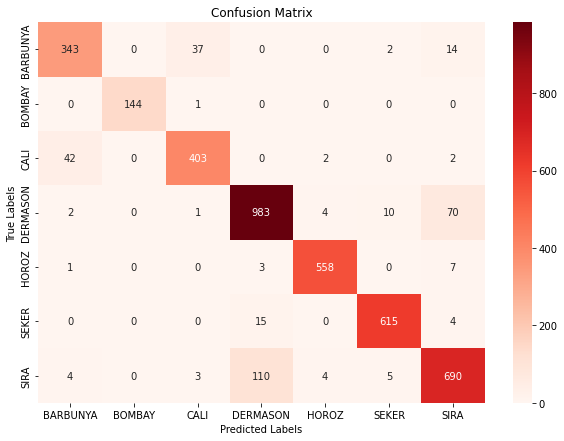

In [15]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=np.unique(y_test_str))

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=np.unique(y_test_str), columns=np.unique(y_test_str))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Reds', cbar=True, 
            xticklabels=np.unique(y_test_str), yticklabels=np.unique(y_test_str))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [16]:
tree = mytree.visualize_tree()
tree.render('Plots/Classification tree', format='png', cleanup=True)

'Plots\\Classification tree.png'

In [17]:
from myTree import Tuning

clf = Tuning()
depth_list = [8,9,10,11,12]
split_list = [2,3,4,5]
scores, means = clf.grid_search(X, y, depth_list, split_list, k=5)
clf.readable_scores(scores, depth_list, split_list)

Calculating Trees: 100%|████████████████████████████████████████████████████████████| 5/5 [11:03:18<00:00, 7959.77s/it]

8 2 [0.8826774549466716, 0.9319602795145274, 0.8778962853990437, 0.9378447958808386, 0.9234731420161884]
8 3 [0.8826774549466716, 0.9319602795145274, 0.8778962853990437, 0.9378447958808386, 0.9231052244297278]
8 4 [0.8826774549466716, 0.9319602795145274, 0.8778962853990437, 0.9378447958808386, 0.9234731420161884]
8 5 [0.8826774549466716, 0.9319602795145274, 0.8778962853990437, 0.9378447958808386, 0.9234731420161884]
9 2 [0.9010665685913939, 0.9345347554247885, 0.8859874954027216, 0.944832659065833, 0.9275202354672554]
9 3 [0.9010665685913939, 0.9345347554247885, 0.8859874954027216, 0.944832659065833, 0.9275202354672554]
9 4 [0.9014343508642884, 0.9345347554247885, 0.8859874954027216, 0.944832659065833, 0.9275202354672554]
9 5 [0.9014343508642884, 0.9345347554247885, 0.8859874954027216, 0.944832659065833, 0.9275202354672554]
10 2 [0.9014343508642884, 0.9363736667892607, 0.8859874954027216, 0.944832659065833, 0.9304635761589404]
10 3 [0.9010665685913939, 0.9363736667892607, 0.88598749540

In [19]:
clf.readable_scores(means, depth_list, split_list)

8 2 0.910770391551454
8 3 0.9106968080341618
8 4 0.910770391551454
8 5 0.910770391551454
9 2 0.9187883427903983
9 3 0.9187883427903983
9 4 0.9188618992449772
9 5 0.9188618992449772
10 2 0.9198183496562088
10 3 0.9197447932016299
10 4 0.9198183496562088
10 5 0.9197447932016299
11 2 0.9194507026968806
11 3 0.9195978156060385
11 4 0.9195242320887462
11 5 0.9195977885433251
12 2 0.9198919602362142
12 3 0.9198919602362142
12 4 0.9200391002080852
12 5 0.9198919602362142


In [135]:
from myTree import ClassificationTree

X = Beans.drop(['Sort order', 'Class'], axis = 1)
y = Beans['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

mytree = ClassificationTree(max_depth=12, min_samples_split=4, random_state=0, data_split_size=0.2)
mytree.fit(X_train, y_train)

In [136]:
mytree.print_tree(mytree.root)

0 Node: Split on 'Constantness'
  If Constantness == 1:
  1 Node: Split on 'MajorAxisLength'
    If MajorAxisLength == < 310.4853055111615:
    2 Node: Split on 'MinorAxisLength'
      If MinorAxisLength == < 180.70409671876598:
      3 Node: Split on 'Perimeter'
        If Perimeter == < 702.9345000000001:
        Leaf: Predict DERMASON
        If Perimeter == >= 702.9345000000001:
        4 Node: Split on 'AspectRation'
          If AspectRation == < 1.7654639322037151:
          5 Node: Split on 'roundness'
            If roundness == < 0.8854766908708676:
            6 Node: Split on 'Area'
              If Area == < 37228.0:
              Leaf: Predict DERMASON
              If Area == >= 37228.0:
              7 Node: Split on 'Solidity'
                If Solidity == < 0.9781582212497595:
                Leaf: Predict SIRA
                If Solidity == >= 0.9781582212497595:
                8 Node: Split on 'Compactness'
                  If Compactness == < 0.7762106986689465:

In [137]:
X_new_train, X_val, y_new_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)
y_pred = mytree.predict(X_new_train)
(y_pred == y_new_train).sum() / len(y_new_train)

0.954697021961596

In [138]:
y_pred = mytree.predict(X_train)
(y_train == y_pred).sum() / len(y_train)

0.9553899926416483

In [139]:
y_pred = mytree.predict(X_test)
y_pred

3514         SIRA
10512        SIRA
5948        HOROZ
9574        SEKER
12521       HOROZ
           ...   
7077     DERMASON
2664     BARBUNYA
12616    BARBUNYA
9552        HOROZ
9310         SIRA
Length: 2718, dtype: object

In [140]:
(y_test == y_pred).sum() / len(y_test)

0.9378219278881531

In [141]:
y_test_str = np.array(y_test, dtype=str)
print(np.unique(y_test_str))
y_pred_str = np.array(y_pred, dtype=str)
print(np.unique(y_pred_str))
print(pd.Series(y_pred_str).value_counts())
print('Classification Report:')
print(classification_report(y_test_str, y_pred_str, target_names=np.unique(y_test_str)))

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
DERMASON    743
SIRA        494
SEKER       389
HOROZ       383
BARBUNYA    307
CALI        304
BOMBAY       98
dtype: int64
Classification Report:
              precision    recall  f1-score   support

    BARBUNYA       0.85      0.90      0.88       289
      BOMBAY       1.00      1.00      1.00        98
        CALI       0.93      0.87      0.90       323
    DERMASON       0.91      0.97      0.94       698
       HOROZ       0.99      0.99      0.99       383
       SEKER       0.98      0.97      0.97       391
        SIRA       0.96      0.88      0.92       536

    accuracy                           0.94      2718
   macro avg       0.94      0.94      0.94      2718
weighted avg       0.94      0.94      0.94      2718



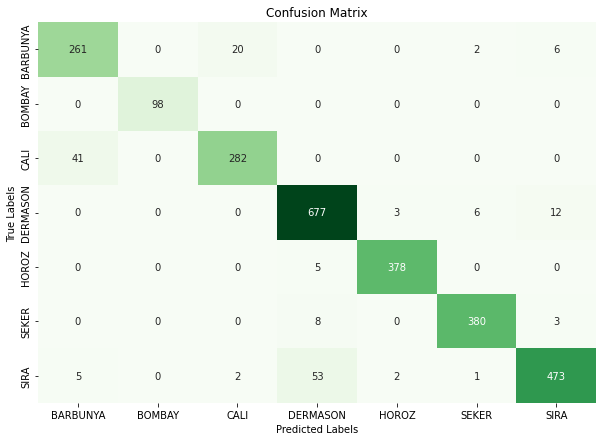

In [142]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test_str, y_pred_str, labels=np.unique(y_test_str))

# Convert to DataFrame for better visualization
cm_df = pd.DataFrame(cm, index=np.unique(y_test_str), columns=np.unique(y_test_str))

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Greens', cbar=False, 
            xticklabels=np.unique(y_test_str), yticklabels=np.unique(y_test_str))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.savefig("Plots/Classification tree confusion matrix")
plt.show()

In [143]:
tree = mytree.visualize_tree()
tree.render('Plots/Classification tree', format='png', cleanup=True)

'Plots\\Classification tree.png'

In [144]:
y.value_counts()

DERMASON    3541
SIRA        2632
SEKER       2025
HOROZ       1927
CALI        1628
BARBUNYA    1316
BOMBAY       521
Name: Class, dtype: int64